# Natural Language Processing Project

# Multi-Label Categorical Classification of English Quotes

<b>Rish (Rishabh) Kaushick</b> <br>
College of Engineering <br>
Northeastern University <br>
Toronto, ON <br>
kaushick.r@northeastern.edu

# Downloading The Dataset From Hugging Face

In [1]:
from huggingface_hub import hf_hub_download
import pandas as pd
import numpy as np

REPO_ID = "Abirate/english_quotes"
FILENAME = "quotes.jsonl"

# since the data is in jsonl format, we read it using read_json() function with lines=True
dataset = pd.read_json(hf_hub_download(repo_id=REPO_ID, filename=FILENAME, repo_type="dataset"), lines=True)


In [2]:
dataset

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"[be-yourself, gilbert-perreira, honesty, inspi..."
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[best, life, love, mistakes, out-of-control, t..."
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[human-nature, humor, infinity, philosophy, sc..."
3,"“So many books, so little time.”",Frank Zappa,"[books, humor]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[books, simile, soul]"
...,...,...,...
2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,","[morality, philosophy]"
2504,“Don't aim at success. The more you aim at it ...,"Viktor E. Frankl,","[happiness, success]"
2505,"“In life, finding a voice is speaking and livi...",John Grisham,[inspirational-life]
2506,"“Winter is the time for comfort, for good food...",Edith Sitwell,"[comfort, home, winter]"


# Exploratory Data Analysis

In [3]:
dataset.head(10)

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"[be-yourself, gilbert-perreira, honesty, inspi..."
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[best, life, love, mistakes, out-of-control, t..."
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[human-nature, humor, infinity, philosophy, sc..."
3,"“So many books, so little time.”",Frank Zappa,"[books, humor]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[books, simile, soul]"
5,"“Be who you are and say what you feel, because...",Bernard M. Baruch,"[ataraxy, be-yourself, confidence, fitting-in,..."
6,“You've gotta dance like there's nobody watchi...,William W. Purkey,"[dance, heaven, hurt, inspirational, life, lov..."
7,“You know you're in love when you can't fall a...,Dr. Seuss,"[dreams, love, reality, sleep]"
8,"“You only live once, but if you do it right, o...",Mae West,"[humor, life]"
9,“Be the change that you wish to see in the wor...,Mahatma Gandhi,"[action, change, inspirational, philosophy, wish]"


In [4]:
# setting random_state in the random sample, so that each time the same value is presented
dataset.sample(5, random_state=23)

,quote,author,tags
2062,"“Why are you worrying about YOU-KNOW-WHO, when...","J.K. Rowling,",[humor]
1078,"“I am not sure that I exist, actually. I am al...",Jorge Luis Borges,[life]
1176,"“If you're lonely when you're alone, you're in...",Jean-Paul Sartre,"[loneliness, solitude]"
414,“You educate a man; you educate a man. You edu...,Brigham Young,"[education, feminism, men, women]"
508,“There is neither happiness nor misery in the ...,Alexandre Dumas,"[hope, inspirational, wisdom]"


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   2508 non-null   object
 1   author  2508 non-null   object
 2   tags    2508 non-null   object
dtypes: object(3)
memory usage: 58.9+ KB


In [6]:
# Quotes by J.k. Rowling
dataset.loc[dataset['author'] == 'J.K. Rowling,']

,quote,author,tags
11,"“If you want to know what a man's like, take a...","J.K. Rowling,","[character, sirius-black]"
31,"“It is our choices, Harry, that show what we t...","J.K. Rowling,","[abilities, choices]"
35,“It does not do to dwell on dreams and forget ...,"J.K. Rowling,","[dreams, life]"
53,“I solemnly swear that I am up to no good.”,"J.K. Rowling,",[mischief]
68,“It takes a great deal of bravery to stand up ...,"J.K. Rowling,","[albus-dumbledore, courage, friends]"
...,...,...,...
2321,“Don't let the muggles get you down.”,"J.K. Rowling,","[encouragement, muggles, wit]"
2342,“I'm going to keep going until I succeed â€” o...,"J.K. Rowling,",[harry-potter]
2401,“You think the dead we loved ever truly leave ...,"J.K. Rowling,",[dead]
2472,"“Hello, Harry"" said George, beaming at him. ""W...","J.K. Rowling,",[humour]


## Exploring The Target Variable - 'tags'

In [7]:
# Understanding the 'tags' attribute:
dataset['tags']

0       [be-yourself, gilbert-perreira, honesty, inspi...
1       [best, life, love, mistakes, out-of-control, t...
2       [human-nature, humor, infinity, philosophy, sc...
3                                          [books, humor]
4                                   [books, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                 [inspirational-life]
2506                              [comfort, home, winter]
2507      [just-listen, loud, owen, sara-dessen, silence]
Name: tags, Length: 2508, dtype: object

In [8]:
dataset['tags'][0]

['be-yourself',
 'gilbert-perreira',
 'honesty',
 'inspirational',
 'misattributed-oscar-wilde',
 'quote-investigator']

In [9]:
dataset['tags'][0][0]

'be-yourself'

In [10]:
dataset['tags'][0][3]

'inspirational'

From the above we can see that the values in the 'tags' attribute are stored as a list.

In [11]:
# Looking for how many unique values are present in the author column
len(dataset['author'].unique())

880

In [12]:
dataset['tags'].value_counts()

tags
[love]                                                                                                                                                                                                                          75
[inspirational]                                                                                                                                                                                                                 63
[humor]                                                                                                                                                                                                                         37
[life]                                                                                                                                                                                                                          34
[writing]                                                                              

The above does not help us much because one row could have multiple categories in the list. <br>
Therefore, in order to see how many unique tags are there, we might need to iterate through the entire pandas dataframe, and store them in a Python set.

In [13]:
# iterating through the values in the pandas dataframe
tags = dataset['tags']
print(tags)
print(type(tags))

0       [be-yourself, gilbert-perreira, honesty, inspi...
1       [best, life, love, mistakes, out-of-control, t...
2       [human-nature, humor, infinity, philosophy, sc...
3                                          [books, humor]
4                                   [books, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                 [inspirational-life]
2506                              [comfort, home, winter]
2507      [just-listen, loud, owen, sara-dessen, silence]
Name: tags, Length: 2508, dtype: object
<class 'pandas.core.series.Series'>


In [14]:
# Iterting though the pandas Series object and adding each value in a Set
# The benefit of the set is that only the unique values will be added, therefore all duplicates will be removed
unique_tags = set()

# row_tags is the list of tags in each row
# we can see that sometimes a single row has multiple tags, therefore, we will nest another for loop inside which reads individual tags
for row_tags in tags:
    for tag in row_tags:
        unique_tags.add(tag)

print(unique_tags)

{'physics', 'travel', 'dhampir', 'words', 'religion', 'treasure', 'jacob', 'energy', 'peeves', 'taking-chances', '1993', 'judgment', 'style', 'what-is-right', 'mood-swings', '2013', 'extremely', 'at-first-sight', 'scotland', 'living-life-to-the-fullest', 'conformity', 'mischief', 'computers', 'true-love', 'individuality', 'diversity', 'romantic', 'greg-behrendt', 'to-be-loved', 'possiblity', 'fool', 'hatred', 'suspicion', 'morning', 'safety', 'persistence', 'humans', 'mindful', 'vampire-academy', 'dionysus', 'new-day', 'feminism', 'canoodle', 'fame', 'posiedon', 'kindle', 'holiness', 'lookingforalaska', 'joh-green', 'school', 'imagination', 'wrong', 'fear', 'tyson', 'voting', 'open-mindedness', 'zombies', 'werewolf', 'paramore', 'who-you-are', 'alchohol', 'sense', 'april', 'yesterday', 'equality', 'nations', 'immortals', 'books', 'mistake', 'misattributed-george-carlin', 'remus-lupin', 'less-more', 'the-mortal-instruments', 'dirty', 'speed-of-light', 'laugh', 'evermore', 'injury', 'ath

In [15]:
len(unique_tags)

2161

There are a total of 2,161 tags. This is too many if we want this to be our target variable.

In [16]:
# Let me create a Python dictionary to store the tag and it's corresponding frequency throughout this dataset.
tag_freq = {}

for row_tag in tags:
    for tag in row_tag:
        if tag in tag_freq:
            tag_freq[tag] += 1
        else:
            tag_freq[tag] = 1

print(tag_freq)

{'be-yourself': 16, 'gilbert-perreira': 1, 'honesty': 12, 'inspirational': 319, 'misattributed-oscar-wilde': 2, 'quote-investigator': 1, 'best': 1, 'life': 295, 'love': 327, 'mistakes': 10, 'out-of-control': 1, 'truth': 61, 'worst': 1, 'human-nature': 9, 'humor': 254, 'infinity': 4, 'philosophy': 60, 'science': 26, 'stupidity': 7, 'universe': 6, 'books': 141, 'simile': 8, 'soul': 12, 'ataraxy': 4, 'confidence': 11, 'fitting-in': 1, 'individuality': 21, 'misattributed-dr-seuss': 1, 'those-who-matter': 1, 'dance': 5, 'heaven': 2, 'hurt': 8, 'sing': 2, 'dreams': 31, 'reality': 17, 'sleep': 7, 'action': 7, 'change': 34, 'wish': 2, 'character': 11, 'sirius-black': 2, 'friends': 28, 'friendship': 63, 'misattributed-albert-camus': 1, 'lies': 12, 'lying': 6, 'memory': 9, 'friend': 3, 'knowledge': 17, 'enemies': 4, 'forgiveness': 10, 'strategy': 3, 'carpe-diem': 7, 'education': 22, 'learning': 15, 'darkness': 7, 'drive-out': 1, 'hate': 10, 'light': 11, 'peace': 14, 'music': 31, 'intelligence': 

In [17]:
# Let us sort the dictionary in descending order of the frequencies:
tag_freq_sorted = sorted(tag_freq.items(), key=lambda x:x[1], reverse=True)
print(tag_freq_sorted)

[('love', 327), ('inspirational', 319), ('life', 295), ('humor', 254), ('books', 141), ('inspiration', 87), ('reading', 86), ('happiness', 68), ('writing', 67), ('inspirational-quotes', 65), ('friendship', 63), ('wisdom', 62), ('truth', 61), ('philosophy', 60), ('optimism', 48), ('living', 48), ('life-quotes', 48), ('death', 47), ('hope', 46), ('poetry', 45), ('romance', 45), ('positive-affirmation', 41), ('positive-thinking', 41), ('women', 40), ('life-lessons', 40), ('optimistic', 40), ('positive', 40), ('positive-life', 40), ('inspire', 38), ('inspiring', 38), ('courage', 37), ('life-and-living', 36), ('change', 34), ('pain', 34), ('funny', 34), ('inspirational-life', 34), ('relationships', 33), ('religion', 32), ('dreams', 31), ('music', 31), ('fear', 31), ('jace-wayland', 29), ('friends', 28), ('strength', 28), ('freedom', 28), ('god', 28), ('inspirational-attitude', 28), ('motivational', 27), ('loneliness', 27), ('science', 26), ('beauty', 26), ('time', 25), ('motivation', 25), (

In [18]:
# printing the top 40 most frequent tags
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    if i == 40:
        break


('love', 327)
('inspirational', 319)
('life', 295)
('humor', 254)
('books', 141)
('inspiration', 87)
('reading', 86)
('happiness', 68)
('writing', 67)
('inspirational-quotes', 65)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('life-quotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('positive-affirmation', 41)
('positive-thinking', 41)
('women', 40)
('life-lessons', 40)
('optimistic', 40)
('positive', 40)
('positive-life', 40)
('inspire', 38)
('inspiring', 38)
('courage', 37)
('life-and-living', 36)
('change', 34)
('pain', 34)
('funny', 34)
('inspirational-life', 34)
('relationships', 33)
('religion', 32)
('dreams', 31)
('music', 31)
('fear', 31)


From the above we can see two main issues with the tags as highlighted in blue and yellow:
1. We can see different columns which conceptually mean the same thing however it is written in different ways. For example, inspirational, inspiration, inspire and inspiring – all mean the same thing. However, it is classified as different tags. For fixing this issue, we must perform lemmatization on the target column.
2. We can see multiple different words separated by a hyphen. For example, positive-affirmation, life-lessons, etc. The hyphenated words must be handled by removing the ‘-‘ symbol. For example, ‘positive-thinking’ will be replaced with the tags positivethinking.

# Data Cleaning
## Handling Words That Contain a Hyphen

In [19]:
dataset['tags'][0]

['be-yourself',
 'gilbert-perreira',
 'honesty',
 'inspirational',
 'misattributed-oscar-wilde',
 'quote-investigator']

In [20]:
type(dataset['tags'][0][0])

str

In [21]:
# removing '-' from hyphenated words:
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        # in this loop we can go through individual tag elements
        if('-' in dataset['tags'][i][j]):
            # here the word contains a '-' character, therefore we can split the data
            # print(dataset['tags'][i][j])
            # new_split_strings = str(dataset['tags'][i][j]).split('-')
            dataset['tags'][i][j] = dataset['tags'][i][j].replace("-", "")
            # print(dataset['tags'][i])
            # print("This is the string: "),
            # print(new_split_strings)
        # print(dataset['tags'][i][j]),
    # print(dataset['tags'][i])
    # below code was written for testing and as a safety measure
    # if (i == 10):
    #     break
# print((dataset['tags'][0:11]))

In [22]:
dataset['tags']

0       [beyourself, gilbertperreira, honesty, inspira...
1       [best, life, love, mistakes, outofcontrol, tru...
2       [humannature, humor, infinity, philosophy, sci...
3                                          [books, humor]
4                                   [books, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                  [inspirationallife]
2506                              [comfort, home, winter]
2507        [justlisten, loud, owen, saradessen, silence]
Name: tags, Length: 2508, dtype: object

In [23]:
# writing a function to calculate the count of tags and returning a list of tuples - [(tag, count of tag)]
def calculate_count_of_tags(tags=dataset['tags']):
    tag_count_dict = {}
    for row in tags:
        for tag in row:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1
    # now sorting it based on the highest values
    tag_freq_sorted = sorted(tag_count_dict.items(), key=lambda x:x[1], reverse=True)
    return tag_freq_sorted
    

In [24]:
tag_freq_sorted = calculate_count_of_tags(tags=dataset['tags'])

In [25]:
# looking at the top 40 most frequent tags:
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    if(i==39):
        break

('love', 327)
('inspirational', 319)
('life', 295)
('humor', 254)
('books', 141)
('inspiration', 87)
('reading', 86)
('happiness', 68)
('writing', 67)
('inspirationalquotes', 65)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('lifequotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('positiveaffirmation', 41)
('positivethinking', 41)
('women', 40)
('lifelessons', 40)
('optimistic', 40)
('positive', 40)
('positivelife', 40)
('inspire', 38)
('inspiring', 38)
('courage', 37)
('lifeandliving', 36)
('change', 34)
('pain', 34)
('funny', 34)
('inspirationallife', 34)
('relationships', 33)
('religion', 32)
('dreams', 31)
('music', 31)


## Performing Lemmetization on Target Column

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# lemmetizing all tags
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        lemma = lemmatizer.lemmatize(dataset['tags'][i][j])
        dataset['tags'][i][j] = lemma
        # print(f"Actual word {dataset['tags'][i][j]}. Lemmatized word by default: {lemma}")
    # if(i==30):
    #     break

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rishabhkaushick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
dataset['tags']

0       [beyourself, gilbertperreira, honesty, inspira...
1       [best, life, love, mistake, outofcontrol, trut...
2       [humannature, humor, infinity, philosophy, sci...
3                                           [book, humor]
4                                    [book, simile, soul]
                              ...                        
2503                               [morality, philosophy]
2504                                 [happiness, success]
2505                                  [inspirationallife]
2506                              [comfort, home, winter]
2507        [justlisten, loud, owen, saradessen, silence]
Name: tags, Length: 2508, dtype: object

In [28]:
# running the count of tags again
tag_freq_sorted = calculate_count_of_tags()
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    if(i==100):
        break

('love', 327)
('inspirational', 319)
('life', 295)
('humor', 254)
('book', 144)
('inspiration', 87)
('reading', 86)
('happiness', 68)
('writing', 67)
('inspirationalquotes', 65)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('lifequotes', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('woman', 42)
('positiveaffirmation', 41)
('positivethinking', 41)
('lifelessons', 40)
('optimistic', 40)
('positive', 40)
('positivelife', 40)
('dream', 38)
('inspire', 38)
('inspiring', 38)
('courage', 37)
('relationship', 36)
('lifeandliving', 36)
('change', 35)
('pain', 34)
('funny', 34)
('inspirationallife', 34)
('religion', 32)
('fear', 32)
('friend', 31)
('music', 31)
('jacewayland', 29)
('god', 29)
('strength', 28)
('freedom', 28)
('inspirationalattitude', 28)
('motivational', 27)
('loneliness', 27)
('science', 26)
('beauty', 26)
('time', 25)
('motivation', 25)
('success', 24)
('art', 23)
('claryfray', 23)
('education', 22)
('fait

However, we still can make it better. We can see some values which are similar like inspirational, inspiration, inspiring, and inspire. We can use the concept of stemming to further improve our target attribute - tags.

## Stemming on Target Column ('Tags')
### Selection of Stemming Algorithm

I decided to use and compare between Snowball and Lancaster Stemmer in this project for the following reasons:
- Snowball Stemmer is an improved version of Porter Stemmer.
- The Lancaster Stemmer has a higher chance of over-stemming (this phrase refers to those times when two different words lead to the same stem) due to its aggressive algorithm selection method in an iterative manner.

#### Snowball Stemmer

In [29]:
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer("english")

print("Using Snowball Stemmer: ")
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        stem = snowball_stemmer.stem(dataset['tags'][i][j])
        # dataset['tags'][i][j] = stem
        print(f"Actual word {dataset['tags'][i][j]}. Stemmed word : {stem}")
    if(i==30):
        break

Using Snowball Stemmer: 
Actual word beyourself. Stemmed word : beyourself
Actual word gilbertperreira. Stemmed word : gilbertperreira
Actual word honesty. Stemmed word : honesti
Actual word inspirational. Stemmed word : inspir
Actual word misattributedoscarwilde. Stemmed word : misattributedoscarwild
Actual word quoteinvestigator. Stemmed word : quoteinvestig
Actual word best. Stemmed word : best
Actual word life. Stemmed word : life
Actual word love. Stemmed word : love
Actual word mistake. Stemmed word : mistak
Actual word outofcontrol. Stemmed word : outofcontrol
Actual word truth. Stemmed word : truth
Actual word worst. Stemmed word : worst
Actual word humannature. Stemmed word : humannatur
Actual word humor. Stemmed word : humor
Actual word infinity. Stemmed word : infin
Actual word philosophy. Stemmed word : philosophi
Actual word science. Stemmed word : scienc
Actual word stupidity. Stemmed word : stupid
Actual word universe. Stemmed word : univers
Actual word book. Stemmed wor

#### Lancaster Stemmer

In [30]:
from nltk.stem import LancasterStemmer

lancaster_stemmer = LancasterStemmer()
print("Using Lancaster Stemmer")
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        stem = lancaster_stemmer.stem(dataset['tags'][i][j])
        # dataset['tags'][i][j] = stem
        print(f"Actual word {dataset['tags'][i][j]}. Stemmed word : {stem}")
    if(i==30):
        break

Using Lancaster Stemmer
Actual word beyourself. Stemmed word : beyourself
Actual word gilbertperreira. Stemmed word : gilbertperreir
Actual word honesty. Stemmed word : honesty
Actual word inspirational. Stemmed word : inspir
Actual word misattributedoscarwilde. Stemmed word : misattributedoscarwild
Actual word quoteinvestigator. Stemmed word : quoteinvestig
Actual word best. Stemmed word : best
Actual word life. Stemmed word : lif
Actual word love. Stemmed word : lov
Actual word mistake. Stemmed word : mistak
Actual word outofcontrol. Stemmed word : outofcontrol
Actual word truth. Stemmed word : tru
Actual word worst. Stemmed word : worst
Actual word humannature. Stemmed word : human
Actual word humor. Stemmed word : hum
Actual word infinity. Stemmed word : infin
Actual word philosophy. Stemmed word : philosoph
Actual word science. Stemmed word : sci
Actual word stupidity. Stemmed word : stupid
Actual word universe. Stemmed word : univers
Actual word book. Stemmed word : book
Actual w

#### Porter Stemmer

In [31]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()
print("Using Porter Stemmer")
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        stem = porter_stemmer.stem(dataset['tags'][i][j])
        # dataset['tags'][i][j] = stem
        print(f"Actual word {dataset['tags'][i][j]}. Stemmed word : {stem}")
    if(i==30):
        break

Using Porter Stemmer
Actual word beyourself. Stemmed word : beyourself
Actual word gilbertperreira. Stemmed word : gilbertperreira
Actual word honesty. Stemmed word : honesti
Actual word inspirational. Stemmed word : inspir
Actual word misattributedoscarwilde. Stemmed word : misattributedoscarwild
Actual word quoteinvestigator. Stemmed word : quoteinvestig
Actual word best. Stemmed word : best
Actual word life. Stemmed word : life
Actual word love. Stemmed word : love
Actual word mistake. Stemmed word : mistak
Actual word outofcontrol. Stemmed word : outofcontrol
Actual word truth. Stemmed word : truth
Actual word worst. Stemmed word : worst
Actual word humannature. Stemmed word : humannatur
Actual word humor. Stemmed word : humor
Actual word infinity. Stemmed word : infin
Actual word philosophy. Stemmed word : philosophi
Actual word science. Stemmed word : scienc
Actual word stupidity. Stemmed word : stupid
Actual word universe. Stemmed word : univers
Actual word book. Stemmed word : 

All 3 stemming approaches do not give out meaningful results in this case. Since our tags must be linguistically meaningful, we will not be performing stemming. 

## Cleaning ‘Tags’ Column Further
### Combining Similar Tags to 'Inspiring', 'Funny' or 'Sad'

In [32]:
for i in range(0, len(dataset)):
    for j in range(0, len(dataset['tags'][i])):
        if dataset['tags'][i][j].lower() == 'inspirational' or dataset['tags'][i][j].lower() == 'inspiration' or dataset['tags'][i][j].lower() == 'inspire' or dataset['tags'][i][j].lower() == 'inspirationalquotes':
            dataset['tags'][i][j] = 'inspiring'
        if dataset['tags'][i][j].lower() == 'humour' or dataset['tags'][i][j].lower() == 'humor':
            dataset['tags'][i][j] = 'funny'
        if dataset['tags'][i][j].lower() == 'depression':
            dataset['tags'][i][j] = 'sadness'
        if dataset['tags'][i][j].lower() == 'lifequotes':
            dataset['tags'][i][j] = 'life'
    # if(i==500):
    #     break

In [33]:
# running the count of tags again
print("The 20 most frequent tags are:")
top_20_tags = []
tag_freq_sorted = calculate_count_of_tags()
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
    top_20_tags.append(tag_freq_sorted[i][0])
    if(i==19):
        break

The 20 most frequent tags are:
('inspiring', 547)
('life', 343)
('love', 327)
('funny', 309)
('book', 144)
('reading', 86)
('happiness', 68)
('writing', 67)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('woman', 42)
('positiveaffirmation', 41)


## Reducing Tags for a Simple Model

In [34]:
# cleaning the data and removing all the tags except for the 20 most frequent tags.

columns = ['quote', 'author', 'tags']
top_20_tags_df = pd.DataFrame(columns=columns)

for i in range(0, len(dataset)):
    # creating a set so that duplicates are removed
    tag_set = set(dataset['tags'][i])
    # since sets do not allow direct access to elements, resetting it to a list
    tag_list = list(tag_set)

    updated_tags = []
    # iterating through items in tag items
    for j in range(0, len(tag_list)):
        if (tag_list[j] in top_20_tags):
            # print(f'{tag_list[j]} is  in the list.')
            updated_tags.append(tag_list[j])
    
    # creating a new row
    # new_row = {'quote': dataset['quote'][i],
    #            'author': dataset['author'][i],
    #            'tags': updated_tags}
    # print(new_row)

    # adding the new row into the new dataframe (more efficient way of inserting items to df)
    top_20_tags_df.loc[len(top_20_tags_df)] = [dataset['quote'][i], dataset['author'][i], updated_tags]

    # for testing
    # if (i==15):
    #     break

In [35]:
top_20_tags_df

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,[inspiring]
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[truth, love, life]"
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[funny, philosophy]"
3,"“So many books, so little time.”",Frank Zappa,"[funny, book]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,[book]
...,...,...,...
2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,",[philosophy]
2504,“Don't aim at success. The more you aim at it ...,"Viktor E. Frankl,",[happiness]
2505,"“In life, finding a voice is speaking and livi...",John Grisham,[]
2506,"“Winter is the time for comfort, for good food...",Edith Sitwell,[]


We can see that there are many rows which have an empty list of tags. This is because those corresponding quotes do not belong to the top 20 categories. To handle these rows, I have decided to convert these rows with empty lists and replace it with a null value. This way later I can easily delete the rows which contain null values.

In [36]:
for i in range(0, len(top_20_tags_df)):
    if(len(top_20_tags_df['tags'][i]) == 0):
        # print(top_20_tags_df['tags'][i])
        top_20_tags_df['tags'][i] = np.nan
    # if(i==20):
    #     break

In [37]:
top_20_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 0 to 2507
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   2508 non-null   object
 1   author  2508 non-null   object
 2   tags    1546 non-null   object
dtypes: object(3)
memory usage: 142.9+ KB


Notice that now there are a total of 1,546 rows which do not have a null value in the 'tags' attribute. Therefore, I will drop the rows which have null values and work on training the models only on the 1546 rows. 

In [38]:
top_20_tags_df.dropna(inplace=True)
top_20_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546 entries, 0 to 2504
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   1546 non-null   object
 1   author  1546 non-null   object
 2   tags    1546 non-null   object
dtypes: object(3)
memory usage: 48.3+ KB


In [39]:
# resetting the index because it says:
# "Index: 1546 entries, 0 to 2504"
top_20_tags_df.reset_index(inplace=True)
top_20_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1546 non-null   int64 
 1   quote   1546 non-null   object
 2   author  1546 non-null   object
 3   tags    1546 non-null   object
dtypes: int64(1), object(3)
memory usage: 48.4+ KB


# Visualization

In [40]:
import matplotlib.pyplot as plt
import plotly.express as px

In [41]:
# visualizing the distribution of the different categories
tag_freq_sorted = calculate_count_of_tags(top_20_tags_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])

('inspiring', 360)
('love', 327)
('life', 295)
('funny', 292)
('book', 144)
('reading', 86)
('happiness', 68)
('writing', 67)
('friendship', 63)
('wisdom', 62)
('truth', 61)
('philosophy', 60)
('optimism', 48)
('living', 48)
('death', 47)
('hope', 46)
('poetry', 45)
('romance', 45)
('woman', 42)
('positiveaffirmation', 41)


In [42]:
# plotting the above data in a histogram
px.histogram(tag_freq_sorted, x=0, y=1,labels={'0': 'quote tag', '1': 'tag frequency'})

From the above histogram we can see that there is an imbalance in the distribution of data in each of the classes. Tags like ‘inspiring’, ‘love’, ‘life’ have significantly higher number of occurrences as compared to ‘hope’, poetry’, ‘romance’ or ‘woman’.

In [43]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

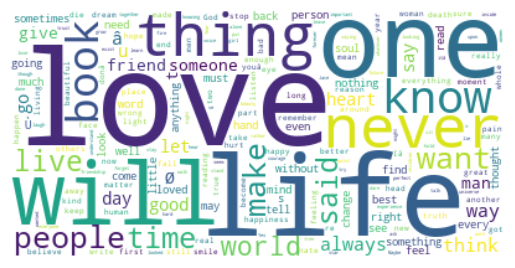

In [44]:
from wordcloud import WordCloud

# joining all the quotes together
all_quotes = ' '.join(top_20_tags_df['quote'])

# generating the word cloud for the quotes
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(all_quotes)

# plotting the generated word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

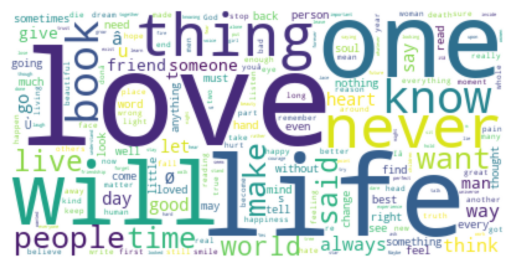

In [45]:
# plotting the generated word cloud using gaussian interpolation
plt.imshow(word_cloud, interpolation='gaussian')
plt.axis("off")

From the above, we can see that ‘love’, ‘life’, ‘one’, ‘will’, and ‘thing’ are one of the most common words in our dataset.

# Data Cleaning & Model Preparation
## Tokenization, Normalization, Stop Word Removal & Lemmetization
From the data we can see that there are some words which contain special characters like ‘Ø’. Therefore, while we tokenize words, we also need to consider normalizing the words to remove the accents.
<br><br>
For tokenizing the words, I decided to use RegexpTokenizer, because we can handle the tokens based on the regular expression parameter. Unlike word tokenizers, regular expression tokenizer can be able to understand and discard punctuation as well.
<br><br>
Additionally, we must remove stop words like 'of', 'the', ‘and’ and 'to' which do not hold much meaning for the machine learning models.
<br><br>
Lastly just like how I performed lemmatization for the target column – tags, I will be performing lemmatization on the quotes column as well.
<br><br>
For performing these 4 tasks, I have decided to write a python function.

In [46]:
type(top_20_tags_df['quote'])

pandas.core.series.Series

In [47]:
# importing the nltk libraries for tokenization, normalization and stop word removal
from nltk.tokenize import RegexpTokenizer
from unidecode import unidecode
from nltk.corpus import stopwords

# downloading the punkt unsupervised model for tokenization & stop words list
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rishabhkaushick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rishabhkaushick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rishabhkaushick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
# The function below takes an input of a pandas dataframe
# it considers the ''quote' attribute performs
# retunrs a pandas dataframe containing 1 column called processed_quote
def preprocess_text(dataframe=top_20_tags_df):
    result_df = pd.DataFrame(columns=['processed_quote'])
    lemmatizer = WordNetLemmatizer()

    # making sure that the text is in lower case
    result_df['processed_quote'] = dataframe['quote'].str.lower()

    # regular expression will split words based on boundary-word-boundary
    regexp_tokenizer = RegexpTokenizer(r'\b\w+\b')

    for i in range (0, len(result_df['processed_quote'])):
        # performing regex tokenization - which will split tokens after each word
        tokens = regexp_tokenizer.tokenize(result_df['processed_quote'][i])

        # removing stop words
        tokens_wo_stop_words = [word for word in tokens if word not in stopwords.words('english')]

        pre_processed_sentenece = ""
        for word in tokens_wo_stop_words:
            # normalization - removing accents by using unidecode - word by word
            # print(str(unidecode(word)))
            normalized_word = unidecode(word)

            # performing lemmetization on the normalized word
            lemma_word = lemmatizer.lemmatize(normalized_word)

            pre_processed_sentenece += str(lemma_word)+' '
        # once we have the entire sentence parsed, we assign it back
        result_df['processed_quote'][i] = pre_processed_sentenece
        
    return result_df


In [49]:
# The function below does the same activity such as preprocess_text
# the only difference is that preprocess_single_quote_text takes in one quote as a string and performs the pre-processing
def preprocess_single_quote_text(quote_string):
    result_string = quote_string.lower()

    # regular expression will split words based on boundary-word-boundary
    regexp_tokenizer = RegexpTokenizer(r'\b\w+\b')
    tokens = regexp_tokenizer.tokenize(result_string)

    # removing stop words
    tokens_wo_stop_words = [word for word in tokens if word not in stopwords.words('english')]

    pre_processed_sentenece = ""
    for word in tokens_wo_stop_words:
        # normalization - removing accents by using unidecode - word by word
        normalized_word = unidecode(word)

        # performing lemmetization on the normalized word
        lemma_word = lemmatizer.lemmatize(normalized_word)

        pre_processed_sentenece += str(lemma_word)+' '
    result_string = pre_processed_sentenece
    return result_string
    

In [50]:
# Testing if this works
test_df = preprocess_text()
test_df['processed_quote']

0                            everyone else already taken 
1       selfish impatient little insecure make mistake...
2       two thing infinite universe human stupidity su...
3                                  many book little time 
4               room without book like body without soul 
                              ...                        
1541                                            part met 
1542    sought hear voice god climbed topmost steeple ...
1543    stepping onto brand new path difficult difficu...
1544    morality simply attitude adopt towards people ...
1545    aim success aim make target going miss success...
Name: processed_quote, Length: 1546, dtype: object

Looks like this has worked, now adding this as a new attribute in the main dataframe object.

In [51]:
top_20_tags_df['processed_quote']= preprocess_text()
top_20_tags_df.head()

,index,quote,author,tags,processed_quote
0,0,“Be yourself; everyone else is already taken.”,Oscar Wilde,[inspiring],everyone else already taken
1,1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[truth, love, life]",selfish impatient little insecure make mistake...
2,2,“Two things are infinite: the universe and hum...,Albert Einstein,"[funny, philosophy]",two thing infinite universe human stupidity su...
3,3,"“So many books, so little time.”",Frank Zappa,"[funny, book]",many book little time
4,4,“A room without books is like a body without a...,Marcus Tullius Cicero,[book],room without book like body without soul


## Encoding Target Column using Multi-Hot-Encoding (Multi-Label Binarizer)
When we had multiple categories of text data – for a single-label classification problem, we tend to use One-Hot-Encoder. In One-Hot-Encoding, there will be a list where one of the categories will be ‘1’ and the rest of them will be ‘0’. Multi-Hot encoders have one main difference, that is, there could be multiple labels which could be ‘1’. One-Hot-Encoders would store data in this way [0, 0, 1, 0], Multi-Hot-Encoders could store data such as [0,1,0,1]. This is required for the multi-label classification problem. I will be using the MultiLabelBinarizer for the multi-label encoding.

In [52]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fitting and transforming the labels into a multi hot encoded value
multi_hot_encoding = mlb.fit_transform(top_20_tags_df['tags'])
print(multi_hot_encoding)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
print((multi_hot_encoding[1]))
print(mlb.classes_)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
['book' 'death' 'friendship' 'funny' 'happiness' 'hope' 'inspiring' 'life'
 'living' 'love' 'optimism' 'philosophy' 'poetry' 'positiveaffirmation'
 'reading' 'romance' 'truth' 'wisdom' 'woman' 'writing']


In [54]:
print(type(multi_hot_encoding))

<class 'numpy.ndarray'>


In [55]:
# Creating new column names based on the labels
new_columns = mlb.classes_

# Creating a dataframe with the relevant column names for the target classes
target_dataframe = pd.DataFrame(multi_hot_encoding, columns=new_columns)

# now concatenating the two dataframes together (axis = 1 for column-based concat)
top_20_tags_df = pd.concat([top_20_tags_df, target_dataframe], axis=1)
top_20_tags_df.head()

,index,quote,author,tags,processed_quote,book,death,friendship,funny,happiness,...,optimism,philosophy,poetry,positiveaffirmation,reading,romance,truth,wisdom,woman,writing
0,0,“Be yourself; everyone else is already taken.”,Oscar Wilde,[inspiring],everyone else already taken,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[truth, love, life]",selfish impatient little insecure make mistake...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,“Two things are infinite: the universe and hum...,Albert Einstein,"[funny, philosophy]",two thing infinite universe human stupidity su...,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3,"“So many books, so little time.”",Frank Zappa,"[funny, book]",many book little time,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,“A room without books is like a body without a...,Marcus Tullius Cicero,[book],room without book like body without soul,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Vectorization using TF-IDF
TF-IDF stands for Term Frequency-Inverse Document Frequency. The TF measures how frequently a term (word) appears in a document (in our case ‘quote’) and the IDF measures how unique or rare a term is across the entire collection of documents (of all the quotes).

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(top_20_tags_df['processed_quote'])
print(tfidf_matrix)

  (0, 4005)	0.5817831133514896
  (0, 133)	0.5004252106231811
  (0, 1275)	0.42025914444250284
  (0, 1364)	0.4842367903249897
  (1, 385)	0.17871190102989123
  (1, 1051)	0.23847563594783777
  (1, 1904)	0.21865743642981111
  (1, 3954)	0.2004229836826724
  (1, 4569)	0.23847563594783777
  (1, 1833)	0.5621956939325564
  (1, 1849)	0.19883923691178446
  (1, 4132)	0.13997256874316663
  (1, 846)	0.23069033369386957
  (1, 2571)	0.23438802635371625
  (1, 2452)	0.1379825731462053
  (1, 2102)	0.26993681579564804
  (1, 2369)	0.17353136258813712
  (1, 2031)	0.29682843689018334
  (1, 3528)	0.26993681579564804
  (2, 3917)	0.43790557909696576
  (2, 1986)	0.2724733199119325
  (2, 4299)	0.6181029327307148
  (2, 2082)	0.3982328609718645
  (2, 4091)	0.18891466464845225
  (2, 4246)	0.26502964670228263
  :	:
  (1545, 1604)	0.1156531426533067
  (1545, 2567)	0.11767007544144556
  (1545, 604)	0.1199248144679078
  (1545, 1779)	0.11767007544144556
  (1545, 1944)	0.09970863337391433
  (1545, 2311)	0.07867772694153514

In [57]:
tfidf_vectorizer.get_feature_names_out()

array(['000', '10', '1234', ..., 'zoe', 'zone', 'zthough'], dtype=object)

In [58]:
tfidf_matrix.shape

(1546, 4626)

In [59]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

# Splitting The Data into Train & Test
While splitting the data, it is important to make sure that the distribution of the labels in both training and testing sets must be similar. For this purpose, I have decided to use the iterative_train_test_split from the skmultilearn library.

In [60]:
from skmultilearn.model_selection import iterative_train_test_split
from scipy.sparse import csr_matrix
# tfidf_matrix
# using iterative_train_split - so that each label is evenly distributed in the train & test sets
X_train, y_train, X_test, y_test = iterative_train_test_split(tfidf_matrix, csr_matrix(target_dataframe), test_size=0.2)

In [61]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (1238, 4626)
X_test (308, 4626)
y_train (1238, 20)
y_test (308, 20)


In [62]:
y_train

<1238x20 sparse matrix of type '<class 'numpy.int64'>'
	with 1799 stored elements in Compressed Sparse Row format>

In [63]:
from scipy.sparse import csr_matrix

# Converting  sparse matrix to a dense matrix
y_train_new = y_train.toarray()

print("\nDense Matrix:")
print(y_train_new)

# setting it to a dataframe
y_train_df = pd.DataFrame(y_train_new, columns=new_columns)
print(y_train_df)


Dense Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
      book  death  friendship  funny  happiness  hope  inspiring  life  \
0        0      0           0      0          0     0          1     0   
1        0      0           0      1          0     0          0     0   
2        1      0           0      1          0     0          0     0   
3        0      0           0      0          0     0          1     1   
4        0      0           0      0          0     0          0     0   
...    ...    ...         ...    ...        ...   ...        ...   ...   
1233     0      0           0      0          0     0          1     0   
1234     0      0           0      0          0     0          1     0   
1235     0      0           0      0          0     0          1     0   
1236     0      0           0      0          0     0          0     0   
1237     0      0           0      0          1    

In [64]:
# similarly for y_test

# Converting  sparse matrix to a dense matrix
y_test_new = y_test.toarray()

y_test_df = pd.DataFrame(y_test_new, columns=new_columns)
print(y_test_df)

     book  death  friendship  funny  happiness  hope  inspiring  life  living  \
0       0      0           0      0          0     0          0     1       0   
1       1      0           0      0          0     0          0     0       0   
2       0      0           0      1          0     0          0     1       0   
3       0      0           1      0          0     0          0     0       0   
4       0      0           0      0          0     0          0     1       0   
..    ...    ...         ...    ...        ...   ...        ...   ...     ...   
303     0      0           0      0          0     0          0     1       0   
304     0      0           0      0          0     0          1     0       0   
305     0      0           0      0          0     1          0     1       0   
306     0      0           0      0          0     0          0     0       0   
307     0      0           0      0          1     0          1     0       0   

     love  optimism  philos

# Multi-Label Naive Bayes Classifier (Baseline Model)
Naïve Bayes (NB) Classifier is a probabilistic machine learning model which is based on the Bayes’ theorem. The MultinomialNB class in the sklearn.naive_bayes can help us to build an NB classifier. However, this class does not support multi-label classification problems.  However, we can use the OneVsRestClassifier in the sklearn.multiclass library and we can place a Naïve Bayes model within the  OneVsRestClassifier. This means that there will be a separate NB Classification model trained on predicting only one of the labels, thereby treating this as a binary classification problem rather than a multi-label classification problem.

In [65]:
# importing the libraries
# from sklearn.pipeline import Pipeline
# from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Define a pipeline combining a text feature extractor with multi lable classifier
# nb_pipeline = Pipeline([
#                 ('clf', OneVsRestClassifier(MultinomialNB(
#                     fit_prior=True, class_prior=None))),
#             ])

# creating a dictionary of the naive bayes classifiers
nb_classifiers = {}

# new_columns is our previously defined list containing all the labels
for label in new_columns:
    print('Fitting the model on the {} label ...'.format(label))
    nb_clf = MultinomialNB()
    # train the model using X_dtm & y
    nb_clf_model = nb_clf.fit(X_train, y_train_df[label])
    prediction = nb_clf_model.predict(X_test)
    # now printing the classification report for each model
    print('The Classification Report for model trained on {} label'.format(label))
    print(classification_report(y_test_df[label], prediction))
    nb_classifiers[label] = nb_clf_model

Fitting the model on the book label ...
The Classification Report for model trained on book label
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       279
           1       0.00      0.00      0.00        29

    accuracy                           0.91       308
   macro avg       0.45      0.50      0.48       308
weighted avg       0.82      0.91      0.86       308

Fitting the model on the death label ...
The Classification Report for model trained on death label
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       299
           1       0.00      0.00      0.00         9

    accuracy                           0.97       308
   macro avg       0.49      0.50      0.49       308
weighted avg       0.94      0.97      0.96       308

Fitting the model on the friendship label ...
The Classification Report for model trained on friendship label
              precision    recall  f1-

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and

In [66]:
# writing a function which performs all the steps for prediction
# input - quote: string, 

def predict_quote(quote, nb_classifiers_dict=nb_classifiers, vectorizer=tfidf_vectorizer):
    # the preprocess_single_quote_text function does tokenization, stop word removal and lemmetization
    result_str = preprocess_single_quote_text(quote)
    # print (result)

    # now using the vectorizer which has already been fitted on the data
    vectorized_str = vectorizer.transform([result_str])
    # for debugging
    # print(vectorized_str)
    # print(type(vectorized_str))
    # print(vectorized_str.shape)
    
    # making the prediction for all the models
    for label, naive_bayes_clf in nb_classifiers_dict.items():
        # print(label)
        # print(naive_bayes_clf)
        pred = naive_bayes_clf.predict(vectorized_str)
        print(label, pred)
        # if(prediction[0] != 0):
        #     print(label, prediction)

In [67]:
predict_quote("Nothing is impossible. The word itself says 'I'm possible!")

book [0]
death [0]
friendship [0]
funny [0]
happiness [0]
hope [0]
inspiring [0]
life [0]
living [0]
love [0]
optimism [0]
philosophy [0]
poetry [0]
positiveaffirmation [0]
reading [0]
romance [0]
truth [0]
wisdom [0]
woman [0]
writing [0]


In [68]:
predict_quote("A room without books is like a body without a soul.")

book [0]
death [0]
friendship [0]
funny [0]
happiness [0]
hope [0]
inspiring [0]
life [0]
living [0]
love [0]
optimism [0]
philosophy [0]
poetry [0]
positiveaffirmation [0]
reading [0]
romance [0]
truth [0]
wisdom [0]
woman [0]
writing [0]


From the above, we can see that the model is not good. For each quote it is predicting the same values - 0. <br>
Also notice how the f1-score for each of the different classifiers is either 0.00 or very close to 0. 

## Improving the Naive Bayes Classifiers

For improving the previous model, I will be taking into account the following:
1. Handling the class imbalance:
I have decided to perform down-sampling. This is because I want to keep the model simple because of limited time and computing constraints.
2. Model hyper-parameter tuning.


### Handling Class Imbalance

In [69]:
# counting classes for insipiring tag
inspiring_count_0, inspiring_count_1 = target_dataframe['inspiring'].value_counts()
# class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
inspiring_label_0 = target_dataframe[target_dataframe['inspiring'] == 0]
inspiring_label_1 = target_dataframe[target_dataframe['inspiring'] == 1]

print('Inspiring Label 0:', inspiring_label_0.shape)
print('Inspiring Label 1:', inspiring_label_1.shape)


Inspiring Label 0: (1186, 20)
Inspiring Label 1: (360, 20)


Since most of the tags have a frequency of 50 - 80, let us try to reduce the inspire tags down to 80. <br>
For this I will drop 280 rows  which have inspiring tag. After dropping the rows, I will recompute the counts of each tag, since some of the data of the other tags will also be lost. 

In [70]:
# the below list wil store the first 180 indexes of the values which need to be dropped.

to_drop_indices = []
for i in range(0, len(top_20_tags_df['tags'])):
    for j in range(0, len(top_20_tags_df['tags'][i])):
        if(top_20_tags_df['tags'][i][j] == 'inspiring'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break #breaking out of the inner j loop
    if(len(to_drop_indices)>=279):
        break

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = top_20_tags_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True)
balanced_df

,level_0,index,quote,author,tags,processed_quote,book,death,friendship,funny,...,optimism,philosophy,poetry,positiveaffirmation,reading,romance,truth,wisdom,woman,writing
0,1,1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[truth, love, life]",selfish impatient little insecure make mistake...,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,2,“Two things are infinite: the universe and hum...,Albert Einstein,"[funny, philosophy]",two thing infinite universe human stupidity su...,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,3,"“So many books, so little time.”",Frank Zappa,"[funny, book]",many book little time,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,4,“A room without books is like a body without a...,Marcus Tullius Cicero,[book],room without book like body without soul,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,7,“You know you're in love when you can't fall a...,Dr. Seuss,[love],know love fall asleep reality finally better d...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1541,2499,“I am a part of all that I have met.”,"Alfred Tennyson,",[inspiring],part met,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1263,1542,2501,“I sought to hear the voice of God and climbed...,John Henry Newman,"[inspiring, love]",sought hear voice god climbed topmost steeple ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1264,1543,2502,"“Stepping onto a brand-new path is difficult, ...",Maya Angelou,[inspiring],stepping onto brand new path difficult difficu...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1265,1544,2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,",[philosophy],morality simply attitude adopt towards people ...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])

The frequent of the tags are:
('love', 291)
('funny', 281)
('life', 220)
('book', 139)
('reading', 84)
('inspiring', 81)
('writing', 62)
('friendship', 58)
('truth', 54)
('happiness', 52)
('philosophy', 51)
('wisdom', 50)
('death', 44)
('romance', 44)
('poetry', 43)
('woman', 39)
('hope', 29)
('living', 14)
('optimism', 13)
('positiveaffirmation', 7)


We can easily write a function for this, but since we have some rows which contain other multiple tags, we might lose out on other tags too. Therefore, I am performing the balancing of the classes one by one and checking the count of all tags after each update.

In [72]:
# performing the same thing for love but removing 210 rows
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'love'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break #breaking out of the inner j loop
    if(len(to_drop_indices)>=210):
        break

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)
balanced_df

,level_0,index,quote,author,tags,processed_quote,book,death,friendship,funny,...,optimism,philosophy,poetry,positiveaffirmation,reading,romance,truth,wisdom,woman,writing
0,2,2,“Two things are infinite: the universe and hum...,Albert Einstein,"[funny, philosophy]",two thing infinite universe human stupidity su...,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,3,3,"“So many books, so little time.”",Frank Zappa,"[funny, book]",many book little time,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,4,“A room without books is like a body without a...,Marcus Tullius Cicero,[book],room without book like body without soul,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,8,"“You only live once, but if you do it right, o...",Mae West,"[funny, life]",live right enough,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9,10,“In three words I can sum up everything I've l...,Robert Frost,[life],three word sum everything learned life go,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,1541,2499,“I am a part of all that I have met.”,"Alfred Tennyson,",[inspiring],part met,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1053,1542,2501,“I sought to hear the voice of God and climbed...,John Henry Newman,"[inspiring, love]",sought hear voice god climbed topmost steeple ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054,1543,2502,"“Stepping onto a brand-new path is difficult, ...",Maya Angelou,[inspiring],stepping onto brand new path difficult difficu...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1055,1544,2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,",[philosophy],morality simply attitude adopt towards people ...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [73]:
# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])

The frequent of the tags are:
('funny', 275)
('life', 201)
('book', 138)
('reading', 83)
('love', 81)
('inspiring', 81)
('writing', 61)
('philosophy', 51)
('truth', 50)
('wisdom', 48)
('happiness', 47)
('friendship', 45)
('death', 39)
('poetry', 37)
('woman', 35)
('romance', 25)
('hope', 25)
('living', 14)
('optimism', 13)
('positiveaffirmation', 7)


In [74]:
# performing the same thing for funny but removing 195 rows
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'funny'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break #breaking out of the inner j loop
    if(len(to_drop_indices)>=195):
        break

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])

The frequent of the tags are:
('life', 186)
('book', 125)
('love', 81)
('inspiring', 81)
('reading', 80)
('funny', 80)
('writing', 58)
('truth', 47)
('wisdom', 47)
('happiness', 45)
('friendship', 43)
('philosophy', 43)
('poetry', 37)
('death', 34)
('woman', 31)
('hope', 25)
('romance', 22)
('living', 14)
('optimism', 13)
('positiveaffirmation', 7)


In [75]:
# performing the same thing for life but removing 106 rows
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'life'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break #breaking out of the inner j loop
    if(len(to_drop_indices)>=106):
        break

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
print(len(balanced_df))

The frequent of the tags are:
('book', 122)
('love', 81)
('inspiring', 81)
('life', 80)
('funny', 80)
('reading', 79)
('writing', 58)
('truth', 46)
('wisdom', 44)
('happiness', 42)
('friendship', 40)
('philosophy', 39)
('poetry', 36)
('woman', 30)
('hope', 24)
('romance', 22)
('death', 22)
('living', 12)
('optimism', 11)
('positiveaffirmation', 7)
756


In [76]:
# performing the same thing for book but removing 42 rows
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'book'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break #breaking out of the inner j loop
    if(len(to_drop_indices)>=41):
        break

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
print(len(balanced_df))

The frequent of the tags are:
('book', 81)
('love', 81)
('inspiring', 81)
('life', 80)
('funny', 80)
('reading', 55)
('writing', 54)
('truth', 45)
('wisdom', 42)
('happiness', 42)
('friendship', 40)
('philosophy', 39)
('poetry', 35)
('woman', 30)
('hope', 24)
('romance', 22)
('death', 22)
('living', 12)
('optimism', 11)
('positiveaffirmation', 7)
715


Let us remove those tags which are less than 30 in number. As there are not enough rows to generalize. Therefore removing:
- hope
- romance
- death
- living
- optimism
- positiveaffirmation

In [77]:
# similarly removing tags one by one - removing 'hope'
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'hope'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break # breaking out of the inner j loop

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
print(len(balanced_df))

The frequent of the tags are:
('book', 81)
('inspiring', 81)
('funny', 80)
('love', 79)
('life', 77)
('reading', 55)
('writing', 54)
('truth', 45)
('wisdom', 42)
('happiness', 42)
('friendship', 40)
('philosophy', 39)
('poetry', 35)
('woman', 30)
('romance', 22)
('death', 22)
('living', 12)
('optimism', 11)
('positiveaffirmation', 7)
691


In [78]:
# similarly removing tags one by one - removing 'romance'
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'romance'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break # breaking out of the inner j loop

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
print(len(balanced_df))

The frequent of the tags are:
('book', 81)
('funny', 79)
('inspiring', 79)
('life', 77)
('love', 75)
('reading', 55)
('writing', 54)
('truth', 45)
('wisdom', 42)
('happiness', 42)
('friendship', 40)
('philosophy', 39)
('poetry', 35)
('woman', 30)
('death', 22)
('living', 12)
('optimism', 11)
('positiveaffirmation', 7)
669


In [79]:
# similarly removing tags one by one - removing 'death'
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'death'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break # breaking out of the inner j loop

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
print(len(balanced_df))

The frequent of the tags are:
('book', 81)
('funny', 79)
('inspiring', 78)
('life', 75)
('love', 73)
('reading', 55)
('writing', 54)
('truth', 44)
('wisdom', 42)
('happiness', 42)
('friendship', 40)
('philosophy', 38)
('poetry', 34)
('woman', 30)
('living', 11)
('optimism', 11)
('positiveaffirmation', 7)
647


In [80]:
# similarly removing tags one by one - removing 'living'
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'living'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break # breaking out of the inner j loop

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
print(len(balanced_df))

The frequent of the tags are:
('book', 81)
('funny', 79)
('love', 73)
('inspiring', 69)
('life', 67)
('reading', 55)
('writing', 54)
('truth', 44)
('wisdom', 42)
('friendship', 40)
('happiness', 40)
('philosophy', 38)
('poetry', 34)
('woman', 30)
('optimism', 5)
('positiveaffirmation', 1)
636


In [81]:
# similarly removing tags one by one - removing 'optimism'
to_drop_indices = []
for i in range(0, len(balanced_df['tags'])):
    for j in range(0, len(balanced_df['tags'][i])):
        if(balanced_df['tags'][i][j] == 'optimism'):
            # this index needs to be dropped
            to_drop_indices.append(i)
            break # breaking out of the inner j loop

# print(to_drop_indices)
# print(len(to_drop_indices))

balanced_df = balanced_df.drop(to_drop_indices, axis='index')
balanced_df.reset_index(inplace=True, drop=True)

# running the count of tags again
print("The frequent of the tags are:")
tag_freq_sorted = calculate_count_of_tags(tags=balanced_df['tags'])
for i in range(0, len(tag_freq_sorted)):
    print(tag_freq_sorted[i])
print(len(balanced_df))

The frequent of the tags are:
('book', 81)
('funny', 79)
('love', 73)
('inspiring', 67)
('life', 65)
('reading', 55)
('writing', 54)
('truth', 44)
('wisdom', 42)
('friendship', 40)
('happiness', 40)
('philosophy', 38)
('poetry', 34)
('woman', 30)
631


In [82]:
# Visualizing the balanced data
px.histogram(tag_freq_sorted, x=0, y=1,labels={'0': 'quote tag', '1': 'tag frequency'})

In [83]:
balanced_df

,level_0,index,quote,author,tags,processed_quote,book,death,friendship,funny,...,optimism,philosophy,poetry,positiveaffirmation,reading,romance,truth,wisdom,woman,writing
0,10,12,“Donâ€™t walk in front of meâ€¦ I may not foll...,Albert Camus,[friendship],dona walk front mea may followdona walk behind...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,11,13,"“If you tell the truth, you don't have to reme...",Mark Twain,[truth],tell truth remember anything,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12,14,“Friendship ... is born at the moment when one...,"C.S. Lewis,",[friendship],friendship born moment one man say another tho...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,22,30,"“All that is gold does not glitter,Not all tho...","J.R.R. Tolkien,",[poetry],gold glitter wander lost old strong wither dee...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,31,40,“It is better to remain silent at the risk of ...,"Maurice Switzer,",[wisdom],better remain silent risk thought fool talk re...,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,1541,2499,“I am a part of all that I have met.”,"Alfred Tennyson,",[inspiring],part met,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,1542,2501,“I sought to hear the voice of God and climbed...,John Henry Newman,"[inspiring, love]",sought hear voice god climbed topmost steeple ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628,1543,2502,"“Stepping onto a brand-new path is difficult, ...",Maya Angelou,[inspiring],stepping onto brand new path difficult difficu...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629,1544,2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,",[philosophy],morality simply attitude adopt towards people ...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [84]:
mlb2_balanced_data = MultiLabelBinarizer()

# Fitting and transforming the labels into a multi hot encoded value
multi_hot_encoding2 = mlb2_balanced_data.fit_transform(balanced_df['tags'])

# Multinomial Naïve Bayes Classifier #2

In [85]:
# preparing the data for the model
balanced_data_columns = []
for i in range(0, len(tag_freq_sorted)):
    balanced_data_columns.append(tag_freq_sorted[i][0])
# print(balanced_data_columns)

target_balanced_dataframe = pd.DataFrame(columns=mlb2_balanced_data.classes_)
target_balanced_dataframe = balanced_df[balanced_data_columns]
target_balanced_dataframe

,book,funny,love,inspiring,life,reading,writing,truth,wisdom,friendship,happiness,philosophy,poetry,woman
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0,0,0,1,0,0,0,0,0,0,0,0,0,0
627,0,0,1,1,0,0,0,0,0,0,0,0,0,0
628,0,0,0,1,0,0,0,0,0,0,0,0,0,0
629,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
from sklearn.model_selection import train_test_split

# vectorization
tfidf_vectorizer2 = TfidfVectorizer()
tfidf_matrix2 = tfidf_vectorizer2.fit_transform(balanced_df['processed_quote'])

# train and test split
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(tfidf_matrix2, csr_matrix(target_balanced_dataframe), test_size=0.25)


print("X_balanced_train", X_balanced_train.shape)
print("X_balanced_test", X_balanced_test.shape)
print("y_balanced_train", y_balanced_train.shape)
print("y_balanced_test", y_balanced_test.shape)


X_balanced_train (473, 2617)
X_balanced_test (158, 2617)
y_balanced_train (473, 14)
y_balanced_test (158, 14)


In [87]:
# Converting  sparse matrix to a dense matrix for both y_test and y_train
y_balanced_train_new = y_balanced_train.toarray()
y_balanced_test_new = y_balanced_test.toarray()

# print(y_balanced_train_new)
# print(y_balanced_test_new)

# # setting it to a dataframe
y_balanced_train_df = pd.DataFrame(y_balanced_train_new, columns=mlb2_balanced_data.classes_)
y_balanced_test_df = pd.DataFrame(y_balanced_test_new, columns=mlb2_balanced_data.classes_)

In [88]:
nb_classifiers2 = {}

for label in balanced_data_columns:
    print('Fitting the model on the {} label ...'.format(label))
    nb_clf = MultinomialNB(alpha=0, fit_prior=False)
    # train the model using X_dtm & y
    nb_clf_model = nb_clf.fit(X_balanced_train, y_balanced_train_df[label])
    prediction = nb_clf_model.predict(X_balanced_test)
    # now printing the classification report for each model
    print('The Classification Report for model trained on {} label'.format(label))
    print(classification_report(y_balanced_test_df[label], prediction))
    nb_classifiers2[label] = nb_clf_model

Fitting the model on the book label ...
The Classification Report for model trained on book label
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       139
           1       0.29      0.21      0.24        19

    accuracy                           0.84       158
   macro avg       0.59      0.57      0.58       158
weighted avg       0.82      0.84      0.83       158

Fitting the model on the funny label ...
The Classification Report for model trained on funny label
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       142
           1       0.27      0.19      0.22        16

    accuracy                           0.87       158
   macro avg       0.59      0.57      0.57       158
weighted avg       0.85      0.87      0.86       158

Fitting the model on the love label ...
The Classification Report for model trained on love label
              precision    recall  f1-score   supp

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/naive_bayes.py:624: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/naive_bayes.py:633: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/naive_bayes.py:624: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/naive_bayes.py:633: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/si

From the f1-scores of the different labels, we can see that this model is indeed better than the first model. The f1-score values are closer to 0 than 1, which tells us that it is not able to correctly identify the classes many times. However, since it is not 0, we know that the model has learnt some knowledge about these tags.

In [89]:
predict_quote(quote="Nothing is impossible. The word itself says 'I'm possible!", vectorizer=tfidf_vectorizer2, nb_classifiers_dict=nb_classifiers2)
print()
predict_quote(quote="A room without books is like a body without a soul.", vectorizer=tfidf_vectorizer2, nb_classifiers_dict=nb_classifiers2)
print()
predict_quote(quote="From there to here, from here to there, funny things are everywhere!", vectorizer=tfidf_vectorizer2, nb_classifiers_dict=nb_classifiers2)
print()
predict_quote(quote="Never take life too seriously. You'll never get out of it alive.", vectorizer=tfidf_vectorizer2, nb_classifiers_dict=nb_classifiers2)


book [0]
funny [0]
love [0]
inspiring [0]
life [0]
reading [0]
writing [0]
truth [0]
wisdom [0]
friendship [0]
happiness [0]
philosophy [0]
poetry [0]
woman [0]

book [0]
funny [0]
love [0]
inspiring [0]
life [0]
reading [0]
writing [0]
truth [0]
wisdom [0]
friendship [0]
happiness [0]
philosophy [0]
poetry [0]
woman [0]

book [0]
funny [0]
love [0]
inspiring [0]
life [0]
reading [0]
writing [0]
truth [0]
wisdom [0]
friendship [1]
happiness [0]
philosophy [0]
poetry [0]
woman [0]

book [0]
funny [1]
love [0]
inspiring [1]
life [0]
reading [1]
writing [0]
truth [0]
wisdom [0]
friendship [0]
happiness [0]
philosophy [0]
poetry [0]
woman [0]


# LSTM (Long-Term-Short-Term-Memory) Model

I have decided to use the LSTM model to implement a more advanced and complex model. The architecture of the model consists of an input layer, an embedding layer, an LSTM layer, 2 dense layers, a dropout layer for regularization, and a dense output layer. In the output layer I have used the sigmoid activation function. This is because as we are working on a multi-label classification problem, this will treat all the labels independently allowing for the prediction of more than one label.

In [90]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenize the text
max_words = 6000
max_len = 512

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(balanced_df['processed_quote'])
sequences = tokenizer.texts_to_sequences(balanced_df['processed_quote'])
X = pad_sequences(sequences, maxlen=max_len)

# we have already performed the multi-label-binarizing
y = multi_hot_encoding2

# Splitting the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
from keras.layers import Input, Embedding, LSTM, Dense, Dropout
from keras.models import Model

# Building an LSTM model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(max_words, 256)(input_layer)
lstm_layer = LSTM(64)(embedding_layer)
dense_layer = Dense(32, activation='relu')(lstm_layer)
dense_layer2 = Dense(32, activation='relu')(dense_layer)
dropout = Dropout(0.5)(dense_layer2)
# dropout = Dropout(0.5)(lstm_layer)
output_layer = Dense(len(mlb2_balanced_data.classes_), activation='sigmoid')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 embedding (Embedding)       (None, 512, 256)          1536000   
                                                                 
 lstm (LSTM)                 (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 14)                462   

In [92]:
from keras.callbacks import ModelCheckpoint
# Creating a checkpoint to save the best model
check_point_lstm = ModelCheckpoint('models/lstm_model/', save_best_only=True)

In [93]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
# Train the model
model.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_split=0.1, callbacks=[check_point_lstm])

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.6343 - accuracy: 0.0640INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 7s 414ms/step - loss: 0.6343 - accuracy: 0.0640 - val_loss: 0.4671 - val_accuracy: 0.0588
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.4877 - accuracy: 0.0706INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 6s 400ms/step - loss: 0.4877 - accuracy: 0.0706 - val_loss: 0.3748 - val_accuracy: 0.0980
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.4167 - accuracy: 0.0795INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 6s 387ms/step - loss: 0.4167 - accuracy: 0.0795 - val_loss: 0.3185 - val_accuracy: 0.0784
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.3916 - accuracy: 0.0596INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 5s 351ms/step - loss: 0.3916 - accuracy: 0.0596 - val_loss: 0.3083 - val_accuracy: 0.0588
Epoch 5/100
15/15 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.1038INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 6s 384ms/step - loss: 0.3610 - accuracy: 0.1038 - val_loss: 0.2950 - val_accuracy: 0.0784
Epoch 6/100
15/15 [==============================] - 4s 296ms/step - loss: 0.3596 - accuracy: 0.0751 - val_loss: 0.2960 - val_accuracy: 0.0784
Epoch 7/100
15/15 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.0751INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 6s 377ms/step - loss: 0.3497 - accuracy: 0.0751 - val_loss: 0.2917 - val_accuracy: 0.0784
Epoch 8/100
15/15 [==============================] - ETA: 0s - loss: 0.3341 - accuracy: 0.0949INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 6s 393ms/step - loss: 0.3341 - accuracy: 0.0949 - val_loss: 0.2901 - val_accuracy: 0.0784
Epoch 9/100
15/15 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.1148INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 6s 381ms/step - loss: 0.3216 - accuracy: 0.1148 - val_loss: 0.2853 - val_accuracy: 0.0784
Epoch 10/100
15/15 [==============================] - ETA: 0s - loss: 0.3166 - accuracy: 0.0861INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 6s 375ms/step - loss: 0.3166 - accuracy: 0.0861 - val_loss: 0.2838 - val_accuracy: 0.0784
Epoch 11/100
15/15 [==============================] - 4s 277ms/step - loss: 0.3033 - accuracy: 0.1678 - val_loss: 0.2847 - val_accuracy: 0.1176
Epoch 12/100
15/15 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.1722INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 5s 343ms/step - loss: 0.3009 - accuracy: 0.1722 - val_loss: 0.2816 - val_accuracy: 0.1373
Epoch 13/100
15/15 [==============================] - ETA: 0s - loss: 0.2784 - accuracy: 0.2031INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 5s 350ms/step - loss: 0.2784 - accuracy: 0.2031 - val_loss: 0.2801 - val_accuracy: 0.1176
Epoch 14/100
15/15 [==============================] - 4s 281ms/step - loss: 0.2644 - accuracy: 0.2561 - val_loss: 0.2802 - val_accuracy: 0.0784
Epoch 15/100
15/15 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.2759INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 5s 370ms/step - loss: 0.2557 - accuracy: 0.2759 - val_loss: 0.2755 - val_accuracy: 0.1176
Epoch 16/100
15/15 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.3377INFO:tensorflow:Assets written to: models/lstm_model/assets


INFO:tensorflow:Assets written to: models/lstm_model/assets


15/15 [==============================] - 5s 357ms/step - loss: 0.2404 - accuracy: 0.3377 - val_loss: 0.2746 - val_accuracy: 0.1373
Epoch 17/100
15/15 [==============================] - 4s 290ms/step - loss: 0.2345 - accuracy: 0.3466 - val_loss: 0.2869 - val_accuracy: 0.1569
Epoch 18/100
15/15 [==============================] - 4s 285ms/step - loss: 0.2140 - accuracy: 0.4106 - val_loss: 0.2757 - val_accuracy: 0.2157
Epoch 19/100
15/15 [==============================] - 4s 275ms/step - loss: 0.2054 - accuracy: 0.4040 - val_loss: 0.2851 - val_accuracy: 0.2353
Epoch 20/100
15/15 [==============================] - 5s 308ms/step - loss: 0.1967 - accuracy: 0.4062 - val_loss: 0.2883 - val_accuracy: 0.1961
Epoch 21/100
15/15 [==============================] - 5s 300ms/step - loss: 0.1890 - accuracy: 0.4592 - val_loss: 0.2986 - val_accuracy: 0.1961
Epoch 22/100
15/15 [==============================] - 4s 278ms/step - loss: 0.1891 - accuracy: 0.4857 - val_loss: 0.2916 - val_accuracy: 0.1961
Epoch

In [95]:
# Loading the best model
from tensorflow.keras.models import load_model
lstm_best_model = load_model('models/lstm_model/')

In [102]:
# Evaluate the model
y_pred = lstm_best_model.predict(X_test2)
y_pred_binary = (y_pred > 0.12).astype(int)

# Inverse transform predictions to original labels
y_test_inv = mlb2_balanced_data.inverse_transform(y_test2)
y_pred_inv = mlb2_balanced_data.inverse_transform(y_pred_binary)

print(y_pred_inv)

# Print classification report
# print(classification_report(y_test_inv, y_pred_inv))

4/4 [==============================] - 0s 95ms/step
[('funny', 'inspiring'), ('funny', 'inspiring'), ('wisdom', 'writing'), ('book', 'funny', 'inspiring', 'reading'), ('book', 'funny', 'life'), ('funny', 'inspiring'), (), ('book', 'funny', 'inspiring'), ('book', 'love', 'poetry', 'reading', 'woman'), ('book', 'reading', 'wisdom'), ('funny',), (), ('book', 'reading'), ('love',), ('book', 'reading'), ('friendship', 'happiness', 'love'), ('love',), ('love', 'poetry', 'woman'), ('love',), ('funny', 'inspiring', 'life', 'writing'), ('wisdom',), ('funny', 'inspiring', 'love'), ('love',), ('funny', 'inspiring'), ('book',), ('happiness', 'wisdom'), ('love',), ('book', 'love'), ('book', 'reading'), ('love',), ('friendship', 'love'), ('poetry',), (), (), (), ('book', 'reading'), ('book', 'inspiring', 'reading'), ('book', 'reading'), (), ('love',), ('book', 'funny', 'inspiring', 'life', 'reading'), ('friendship', 'happiness', 'love', 'wisdom'), (), ('love',), ('love',), ('love',), ('friendship', 

In [97]:
# Print classification report
print(classification_report(y_test2, y_pred_binary))

              precision    recall  f1-score   support

           0       0.34      0.60      0.44        20
           1       0.20      0.29      0.24         7
           2       0.10      0.20      0.14        15
           3       0.22      0.50      0.31         4
           4       0.08      0.22      0.12         9
           5       0.00      0.00      0.00        10
           6       0.19      0.67      0.30        15
           7       0.00      0.00      0.00         5
           8       0.18      0.22      0.20         9
           9       0.35      0.64      0.45        14
          10       1.00      0.09      0.17        11
          11       0.18      0.33      0.23         9
          12       0.17      0.14      0.15         7
          13       0.33      0.21      0.26        14

   micro avg       0.21      0.34      0.26       149
   macro avg       0.24      0.29      0.21       149
weighted avg       0.26      0.34      0.24       149
 samples avg       0.21   

/opt/homebrew/anaconda3/envs/info7390/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [100]:
print(mlb2_balanced_data.classes_)

['book' 'friendship' 'funny' 'happiness' 'inspiring' 'life' 'love'
 'philosophy' 'poetry' 'reading' 'truth' 'wisdom' 'woman' 'writing']


In [129]:
pre_processed_str = preprocess_single_quote_text(quote_string="A room without books is like a body without a soul.")

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(balanced_df['processed_quote'])
sequences = tokenizer.texts_to_sequences([pre_processed_str])
X = pad_sequences(sequences, maxlen=max_len)

y_pred = lstm_best_model.predict(X)
y_pred_binary = (y_pred > 0.12).astype(int)
print(mlb2_balanced_data.inverse_transform(y_pred_binary))

1/1 [==============================] - 0s 15ms/step
[('love',)]


This should have been categorized as ‘book’, however the deep learning classifier thinks it belongs to the category ‘love’.

We can see that the LSTM model may be slightly better than the Naïve Bayes model #2 for certain tags, however still this model does not perform very well. The reason behind this could be because of two reasons:
1.	We have very less data which the model has been trained on. As shown above, we only had 450+ rows of data for training and about 150 data points for testing.
2.	The data does not generalize on the labels well. During the labeling of the data, some quotes could be mistakenly tagged to certain tags which could make the models unable to generalize.

# Conclusion
In this project I understood how to tackle natural language processing problems along with solving multi-label classification tasks. I learnt about and used language concepts such as lemmatization and stemming for combining words which mean the same thing. Furthermore, I coupled with techniques such as tokenization and removal of stop words, to clean the text to a standard format. 
While performing exploratory data analysis I understood about the importance of handling imbalanced class distributions in the target column. This had a direct impact on the first Naïve Bayes machine learning model. Upon fixing the imbalanced target labels, the second Naïve Bayes classifier performed much better (even though it was not very good).
As machines have a harder time understanding text compared to numbers, I learnt about using vectorization using the TF-IDF (term frequency – inverse term frequency) approach.
Finally, I used a deep learning approach using LSTMs and evaluated all the models using the precision, recall, and f1-score.
